<a href="https://colab.research.google.com/github/LakshitaJoshi/ImageClassificationCodeTech/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

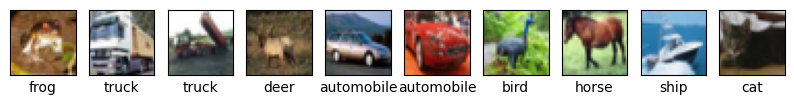

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 62ms/step - accuracy: 0.3487 - loss: 1.7537 - val_accuracy: 0.5606 - val_loss: 1.2200
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 50ms/step - accuracy: 0.5644 - loss: 1.2254 - val_accuracy: 0.6182 - val_loss: 1.0893
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 47ms/step - accuracy: 0.6302 - loss: 1.0534 - val_accuracy: 0.6292 - val_loss: 1.0621
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.6632 - loss: 0.9646 - val_accuracy: 0.6618 - val_loss: 0.9615
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.6955 - loss: 0.8680 - val_accuracy: 0.6705 - val_loss: 0.9429
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.7179 - loss: 0.8127 - val_accuracy: 0.6949 - val_loss: 0.8759
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.7321 - loss: 0.7710 - val_accuracy: 0.6954 - val_loss: 0.8848
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.7495

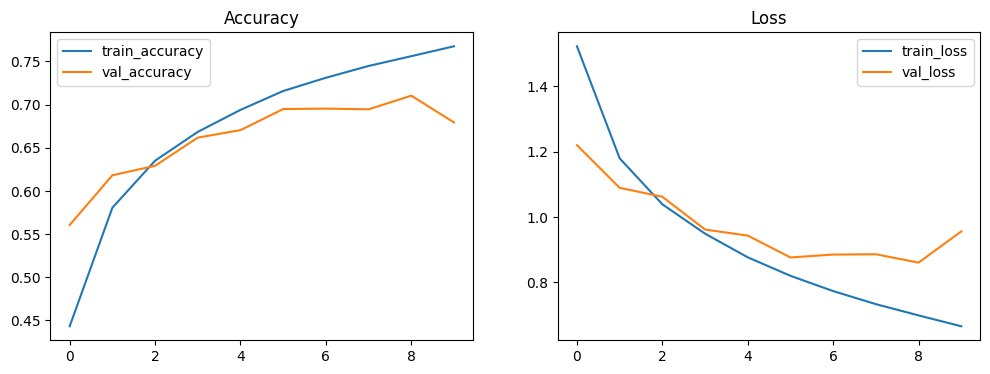

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


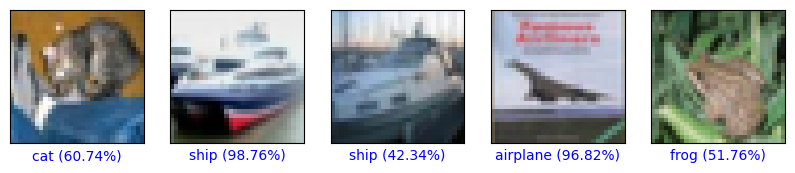

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Classification Report:

              precision    recall  f1-score   support

    airplane       0.60      0.82      0.69      1000
  automobile       0.80      0.82      0.81      1000
        bird       0.50      0.71      0.59      1000
         cat       0.56      0.44      0.49      1000
        deer       0.83      0.42      0.56      1000
         dog       0.50      0.68      0.58      1000
        frog       0.85      0.69      0.76      1000
       horse       0.85      0.64      0.73      1000
        ship       0.76      0.83      0.79      1000
       truck       0.83      0.74      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.71      0.68      0.68     10000
weighted avg       0.71      0.68      0.68     10000



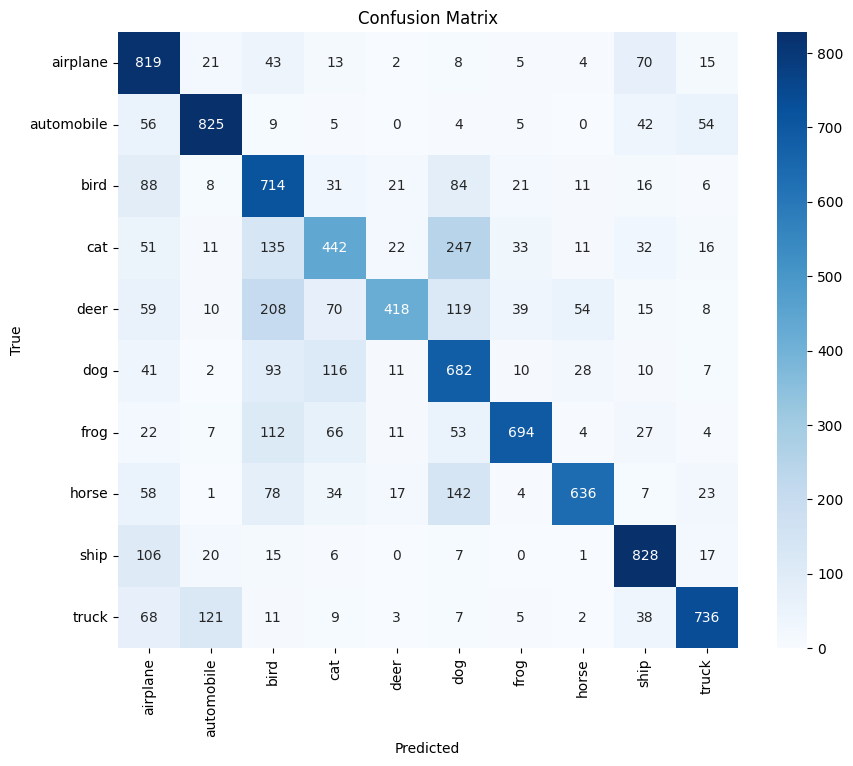

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = y_train.flatten()
y_test = y_test.flatten()

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()


model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\n Test accuracy:', test_acc)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')
plt.show()

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)


def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({100*np.max(predictions_array):.2f}%)", color=color)


plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plot_image(i, predictions[i], y_test, x_test)
plt.show()
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred_probs = probability_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)


print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

